In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms
from skimage import io






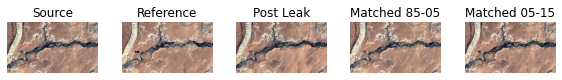

In [ ]:
reference = io.imread("/content/bluff1984.jpg")
image = io.imread("/content/bluff2005.jpg")
postleak = io.imread("/content/bluff2015.jpg")

matched = match_histograms(image, reference, multichannel=True)
matched2 = match_histograms(image, postleak, multichannel=True)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3, ax4, ax5):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(postleak)
ax3.set_title('Post Leak')
ax4.imshow(matched)
ax4.set_title('Matched 85-05')
ax5.imshow(matched2)
ax5.set_title ('Matched 05-15')

plt.tight_layout()
plt.show()

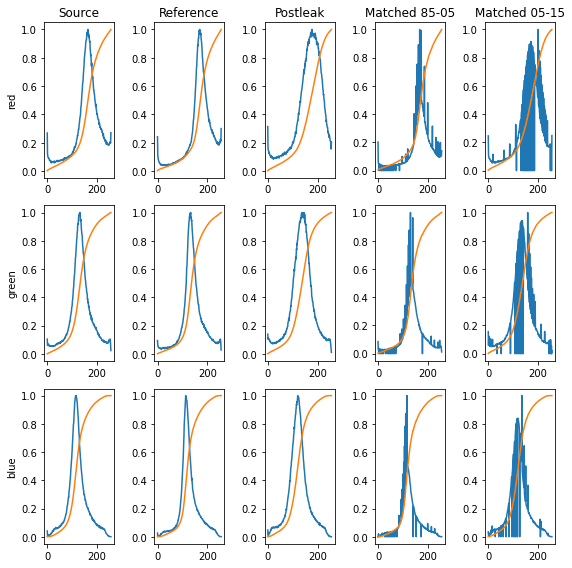

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(8, 8))


for i, img in enumerate((image, reference, postleak, matched, matched2)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Postleak')
axes[0, 3].set_title('Matched 85-05')
axes[0, 4].set_title('Matched 05-15')

plt.tight_layout()
plt.show()
